![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

# Research to Production
## Uncorrelated Assets
---------
### Introduction
This page explains how to you can use the Research Environment to develop and test a Uncorrelated Assets hypothesis, then put the hypothesis in production.

<a href="https://www.quantconnect.com/docs/v2/research-environment/tutorials/research-to-production/uncorrelated-assets">Documentation</a>

### Create Hypothesis
According to Modern Portfolio Thoery, asset combinations with negative or very low correlation could have lower total portfolio variance given the same level of return. Thus, uncorrelated assets allows you to find a portfolio that will, theoretically, be more diversified and resilient to extreme market events. We're testing this statement in real life scenario, while hypothesizing a portfolio with uncorrelated assets could be a consistent portfolio. In this example, we'll compare the performance of 5-least-correlated-asset portfolio (proposed) and 5-most-correlated-asset portfolio (benchmark), both equal weighting.

### Import Libraries
We'll need to import libraries to help with data processing and visualization. Import numpy and matplotlib libraries by the following:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Get Historical Data
To begin, we retrieve historical data for research.

In [2]:
# Instantiate a QuantBook.
qb = QuantBook()

# Select the desired tickers for research.
assets = ["SHY", "TLT", "SHV", "TLH", "EDV", "BIL",
          "SPTL", "TBT", "TMF", "TMV", "TBF", "VGSH", "VGIT",
          "VGLT", "SCHO", "SCHR", "SPTS", "GOVT"]

# Call the AddEquity method with the tickers, and its corresponding resolution. Then store their Symbols. Resolution.Minute is used by default. 
for i in range(len(assets)):
    qb.AddEquity(assets[i],Resolution.Minute)

# Call the History method with qb.Securities.Keys for all tickers, time argument(s), and resolution to request historical data for the symbol.
history = qb.History(qb.Securities.Keys, datetime(2021, 1, 1), datetime(2021, 12, 31), Resolution.Daily)
history

close        high         low        open  \
symbol            time                                                         
SCHR UOVIOSUIT3DX 2021-01-05   57.679325   57.679325   57.580304   57.590206   
                  2021-01-06   57.610011   57.650015   57.570402   57.639717   
                  2021-01-07   57.421872   57.461480   57.362460   57.461480   
                  2021-01-08   57.312950   57.332754   57.293146   57.322852   
                  2021-01-09   57.233733   57.273342   57.194125   57.243635   
...                                  ...         ...         ...         ...   
TLH TP8J6Z7L419H  2021-12-24  148.830000  149.520000  148.460100  149.520000   
                  2021-12-28  148.850000  149.057400  148.630000  148.700000   
                  2021-12-29  148.560000  149.460000  148.395000  149.440000   
                  2021-12-30  147.190000  147.735000  146.971800  147.470000   
                  2021-12-31  148.080000  148.090000  147.120000  147.730000   

                                volume  
symbol            time                  
SCHR UOVIOSUIT3DX 2021-01-05  457504.0  
                  2021-01-06  390160.0  
                  2021-01-07  501967.0  
                  2021-01-08  651166.0  
                  2021-01-09  561334.0  
...                                ...  
TLH TP8J6Z7L419H  2021-12-24   87056.0  
                  2021-12-28   81923.0  
                  2021-12-29   48122.0  
                  2021-12-30   92448.0  
                  2021-12-31   91544.0  

[4518 rows x 5 columns]

### Preparing Data
We'll have to process our data to get their correlation and select the least and most related ones.

In [3]:
# Select the close column and then call the unstack method, then call pct_change to compute the daily return.
returns = history['close'].unstack(level=0).pct_change().iloc[1:]

# Write a function to obtain the least and highest correlated 5 assets.
def GetUncorrelatedAssets(returns, num_assets):
    # Get correlation
    correlation = returns.corr()
    
    # Find assets with lowest and highest absolute sum correlation
    selected = []
    for index, row in correlation.iteritems():
        corr_rank = row.abs().sum()
        selected.append((index, corr_rank))

    # Sort and take the top num_assets
    sort_ = sorted(selected, key = lambda x: x[1])
    uncorrelated = sort_[:num_assets]
    correlated = sort_[-num_assets:]
    
    return uncorrelated, correlated

selected, benchmark = GetUncorrelatedAssets(returns, 5)
selected, benchmark

([('BIL TT1EBZ21QWKL', 1.8063494247007672),
  ('SHV TP8J6Z7L419H', 1.895191881475744),
  ('SST V2245V5VOQQT', 8.282712782924655),
  ('SCHO UOVIOSUIT3DX', 8.678784045255416),
  ('VGSH UHVG8V7B7YAT', 9.183402854376084)],
 [('VGLT UHVG8V7B7YAT', 12.991587228257417),
  ('TLO TT1EBZ21QWKL', 13.013133856739254),
  ('SCHR UOVIOSUIT3DX', 13.089405404414283),
  ('TLH TP8J6Z7L419H', 13.12274004038568),
  ('VGIT UHVG8V7B7YAT', 13.139165728906882)])

### Test the Hypothesis
To test the hypothesis: Our desired outcome would be a consistent and low fluctuation equity curve should be seen, as compared with benchmark.

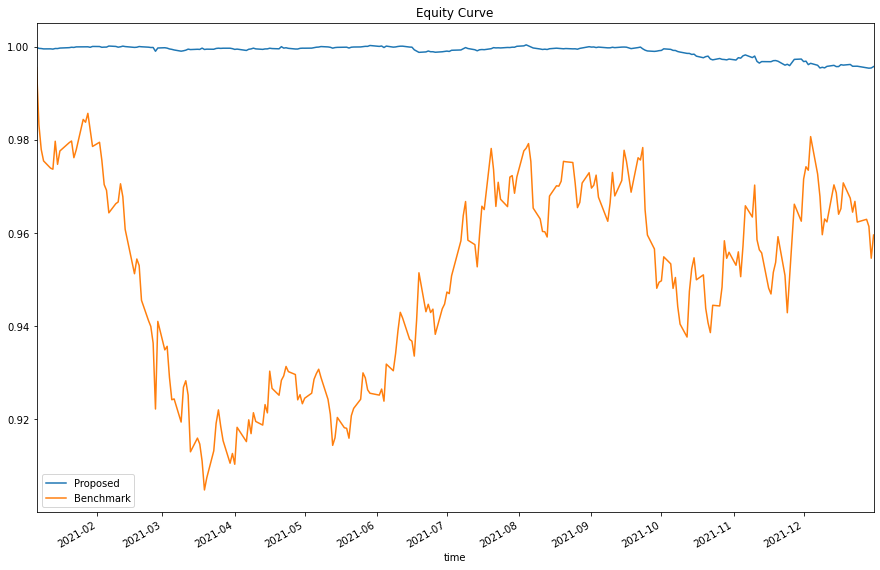

In [4]:
# Construct a equal weighting portfolio for the 5-uncorrelated-asset-portfolio and the 5-correlated-asset-portfolio (benchmark).
port_ret = returns[[x[0] for x in selected]] / 5
bench_ret = returns[[x[0] for x in benchmark]] / 5

# Call cumprod to get the cumulative return.
total_ret = (np.sum(port_ret, axis=1) + 1).cumprod()
total_ret_bench = (np.sum(bench_ret, axis=1) + 1).cumprod()

# Plot the result.
plt.figure(figsize=(15, 10))
total_ret.plot(label='Proposed')
total_ret_bench.plot(label='Benchmark')
plt.title('Equity Curve')
plt.legend()
plt.show()

We can clearly see from the results, the proposed uncorrelated-asset-portfolio has a lower variance/fluctuation, thus more consistent than the benchmark. This proven our hypothesis.